In [3]:
# overlay the RF data with DC data
# are they the same shape?

%matplotlib inline
import local_broom

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from monty import Monty

In [6]:
# load the data
monty = Monty("rf.set testing")
monty.run_map

Loading existing experiment (ignoring given experiment parameters)
Note that no experimental data has been loaded.
Next run will have id 3


['spectroscopy', 'set_ST_sweep', '1D_SET_sweep']

In [58]:
# Load rf data
rf_data = monty.loadrun("set_ST_sweep")
rf = rf_data["data"][::-1]  # reverse direction

{'datafiles': ['set_ST_sweep.xz'], 'figures': ['set_ST_sweep_sweep.png'], 'parameters': {'dr_amp_sweep': "LinearSweepParameter(uid='dr_amp', start=-1.0, stop=1.0, count=401, axis_name=None)", 'dr_pout_range': 5, 'dr_pulse': "PulseFunctional(function='const', uid='dr_pulse', amplitude=0.5, length=0.00012, can_compress=True, pulse_parameters=None)", 'exp_name': 'sweep', 'integration_time': 0.0001, 'num_averages': 8, 'ro_lo': 1000000000.0, 'ro_osc_gain': 0.5, 'ro_pin_range': -5, 'ro_pout_range': 0, 'set_freq': 406600000.0, 'wait_after_int': 1e-05}, 'runid': 2, 'time_end': '2024-06-20 13:47:45.002416', 'time_start': '2024-06-20 13:47:07.981039'}
Loading 'C:\Users\LD2007\Documents\Si_CMOS_james\data\rf/set_testing\set_ST_sweep.xz'


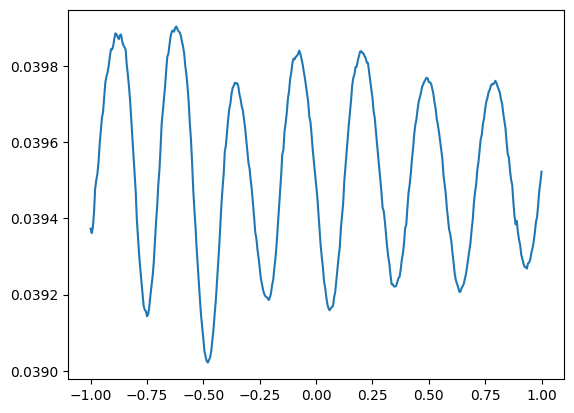

In [59]:
rf_x = np.linspace(-1, 1, len(rf))
plt.plot(rf_x, np.abs(rf))

In [60]:
# Load DC data
dc_data = monty.loadrun("1D_SET_sweep")
R, P = dc_data["R"], dc_data["P"]

{'datafiles': ['1D_SET_sweep.xz'], 'figures': ['1D_SET_sweep_1D.png'], 'parameters': {'SLB': 'Fixed at 0.949997V', 'SRB': 'Fixed at 0.950002V', 'ST': 'range from 3.3v -> 3.6v, over 500 pts', 'desc': 'Quick 1D scan of the SET over ST'}, 'runid': 3, 'time_end': '2024-06-20 14:02:47.492772', 'time_start': '2024-06-20 13:59:21.547810'}
Loading 'C:\Users\LD2007\Documents\Si_CMOS_james\data\rf/set_testing\1D_SET_sweep.xz'


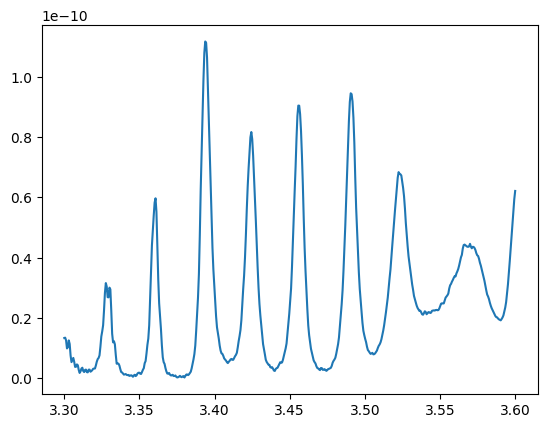

In [61]:
dc_x = np.linspace(3.3, 3.6, 500)
plt.plot(dc_x, R)

Text(0, 0.5, 'RF')

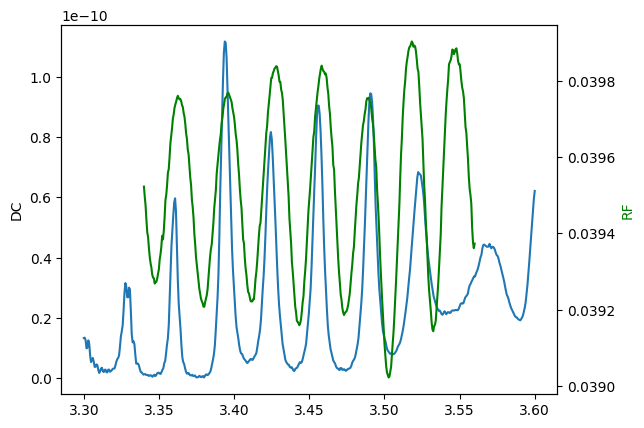

In [63]:
# overlay both
center = 3.45
scaling = -0.11

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(dc_x, R, label="DC")
ax1.set_ylabel("DC")

ax2.plot(scaling*rf_x + center, np.abs(rf), label="RF", color="g")
ax2.set_ylabel("RF", color="g")